<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
!pip install split_folders

In [5]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/drive/My Drive/data-liverdisease', output="/content/drive/My Drive/data_output1", seed=1337, ratio=(.7, .2,.1)) # default values



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:02,  2.35s/ files]
Copying files: 2 files [00:03,  1.89s/ files]
Copying files: 3 files [00:03,  1.52s/ files]
Copying files: 4 files [00:04,  1.40s/ files]
Copying files: 5 files [00:05,  1.19s/ files]
Copying files: 6 files [00:06,  1.05s/ files]
Copying files: 7 files [00:07,  1.05 files/s]
Copying files: 8 files [00:07,  1.13 files/s]
Copying files: 9 files [00:08,  1.18 files/s]
Copying files: 10 files [00:09,  1.27 files/s]
Copying files: 11 files [00:09,  1.32 files/s]
Copying files: 12 files [00:10,  1.40 files/s]
Copying files: 13 files [00:11,  1.39 files/s]
Copying files: 14 files [00:12,  1.37 files/s]
Copying files: 15 files [00:12,  1.41 files/s]
Copying files: 16 files [00:13,  1.45 files/s]
Copying files: 17 files [00:14,  1.43 files/s]
Copying files: 18 files [00:14,  1.44 files/s]
Copying files: 19 files [00:15,  1.41 files/s]
Copying files: 20 files [00:16,  1.40 files/s]
Copying files: 21 files [0

In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_output1/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_output1/val", target_size=(224,224))

Found 700 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [24]:
from keras.applications.vgg19 import VGG19
vggmodel = VGG19(weights='imagenet', include_top=True)

574717952/574710816 [==============================] - 34s 0us/step


In [25]:
vggmodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
for layers in (vggmodel.layers)[:22]:
    print(layers)
    layers.trainable = False

In [35]:
X= vggmodel.layers[-2].output

predictions = Dense(4, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [36]:
for i in vggmodel.layers:
  print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [37]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [38]:
model_final.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [39]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist=model_final.fit(traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg19_1.h5")

Epoch 1/100
2/2 [==============================] - 65s 32s/step - loss: 3.0085 - accuracy: 0.3125 - val_loss: 1.7095 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to vgg19_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
2/2 [==============================] - 68s 34s/step - loss: 1.4533 - accuracy: 0.5625 - val_loss: 1.1728 - val_accuracy: 0.6875

Epoch 00002: val_accuracy improved from 0.53125 to 0.68750, saving model to vgg19_1.h5
Epoch 3/100
2/2 [==============================] - 64s 32s/step - loss: 0.9484 - accuracy: 0.6719 - val_loss: 0.7966 - val_accuracy: 0.8125

Epoch 00003: val_accuracy improved from 0.68750 to 0.81250, saving model to vgg19_1.h5
Epoch 4/100
2/2 [==============================] - 63s 32s/step - loss: 0.7300 - accuracy: 0.7656 - val_loss: 0.3236 - val_accuracy: 0.8750

Epoch 00004: val_accuracy improved from 0.81250 to 0.87500, saving model to vgg19_1.h5
Epoch 5/100
2/2 [==============================] - 63s 32s/step - loss: 0.6461 - accuracy: 0.7344 - val_loss: 0.6282 - val_accuracy: 0.6875

Epoch 00005: val_accuracy did not improve from 0.87500
Epoch 6/100
2/2 [==============================] - 61s 30s/step - loss: 0.7401 - accuracy: 0.7167 - val_loss: 0.4503 - v

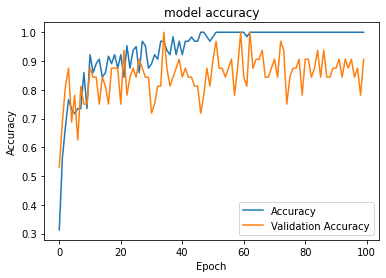

In [40]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

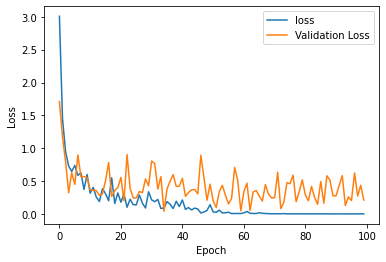

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [42]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [43]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_ouput/test',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 100 images belonging to 4 classes.


In [44]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_final.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[4 5 8 8]
 [7 6 5 7]
 [6 7 5 7]
 [8 6 7 4]]
Classification Report
              precision    recall  f1-score   support

      grade0       0.16      0.16      0.16        25
      grade1       0.25      0.24      0.24        25
      grade2       0.20      0.20      0.20        25
      grade3       0.15      0.16      0.16        25

    accuracy                           0.19       100
   macro avg       0.19      0.19      0.19       100
weighted avg       0.19      0.19      0.19       100



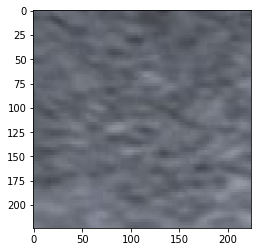

In [45]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("/content/drive/My Drive/data_ouput/test/grade1/grade1-079.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [46]:
output = model_final.predict(img)

In [47]:
output
ans='grade'+str(np.argmax(output[0],axis=0))
print(ans)

grade1


In [48]:
import os
data_path='/content/drive/My Drive/data_ouput/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))




grade1
correct Count 19 WrongCount 6
grade0
correct Count 24 WrongCount 1
grade2
correct Count 23 WrongCount 2
grade3
correct Count 20 WrongCount 5


In [49]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

4/4 [==============================] - 63s 16s/step


0.8600000143051147

In [ ]:
model_final.save('/content/drive/My Drive/Best models/modelbest.h5')